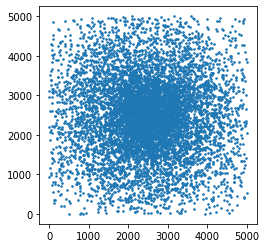

In [1]:
# Generating Houses data

import numpy as np
import matplotlib.pyplot as plt

n_houses = 8000
np.random.seed(17)

i = 0
samples_x = []
samples_y = []

n_sample_1 = n_houses * 0.25
while i < n_sample_1:
    x = np.random.normal(loc=0, scale=500)
    y = np.random.normal(loc=0, scale=500)
    if abs(x) < 1000 and abs(y) < 1000:
        samples_x.append(x)
        samples_y.append(y)
        i+=1
i=0
n_sample_2 = n_houses * 0.75
while i < n_sample_2:
    x = np.random.normal(loc=0, scale=1250)
    y = np.random.normal(loc=0, scale=1250)
    if abs(x) < 2500 and abs(y) < 2500:
        samples_x.append(x)
        samples_y.append(y)
        i+=1        

for i in range(0, n_houses):
    samples_x[i] += 2500
    samples_y[i] += 2500
        
        
        
plt.scatter(samples_x, samples_y, marker=".",s=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw() 

## 1. In which areas of the city should blu focus on advertising about how using blu would decrease transportation costs more? Provide a heatmap.

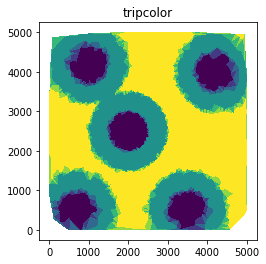

In [2]:
def distanc(x1, x2, y1, y2):
    return ((x2 - x1)**2 +(y2 - y1)**2)**0.5

A = [2000, 2500]
B = [4200, 4000]
C = [3500, 500]
D = [1000, 4200]
E = [700, 500]

samples_z = []
for i in range(0, 8000):
    min_distance = min(
                        distanc(A[0], samples_x[i], A[1], samples_y[i]),
                        distanc(B[0], samples_x[i], B[1], samples_y[i]),
                        distanc(C[0], samples_x[i], C[1], samples_y[i]),
                        distanc(D[0], samples_x[i], D[1], samples_y[i]),
                        distanc(E[0], samples_x[i], E[1], samples_y[i]),
                      )
    if min_distance < 500:
        samples_z.append(1)
    elif min_distance < 1000:
        samples_z.append(3)
    else:
        samples_z.append(5)
        
fig, ax=plt.subplots(ncols=1)
ax.set_title("tripcolor")
ax.tripcolor(samples_x, samples_y, samples_z)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

The blu should focus on dark areas for advertising.

## 2. Where is the best location to build a new bank to minimize the transportation costs? Providing a heatmap of a measure of “goodness of location” is a plus.

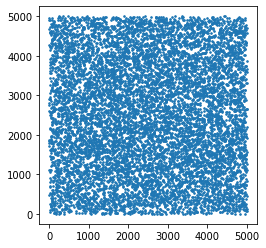

In [3]:
n_banks = 10000

i = 0
banks_x = []
banks_y = []

i=0
while i < n_banks:
    x = np.random.normal(loc=0, scale=5000)
    y = np.random.normal(loc=0, scale=5000)
    if abs(x) < 2500 and abs(y) < 2500:
        banks_x.append(x)
        banks_y.append(y)
        i+=1

for i in range(0, n_banks):
    banks_x[i] += 2500
    banks_y[i] += 2500

plt.scatter(banks_x, banks_y, marker=".",s=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

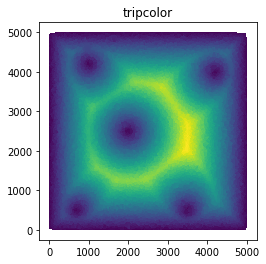

In [4]:
banks_z = []

for i in range(0, n_banks):
    score = min(
                (distanc(A[0], banks_x[i], A[1], banks_y[i])),
                (distanc(B[0], banks_x[i], B[1], banks_y[i])),
                (distanc(C[0], banks_x[i], C[1], banks_y[i])),
                (distanc(D[0], banks_x[i], D[1], banks_y[i])),
                (distanc(E[0], banks_x[i], E[1], banks_y[i])),
                (distanc(0, banks_x[i], banks_y[i], banks_y[i])),
                (distanc(5000, banks_x[i], banks_y[i], banks_y[i])),
                (distanc(banks_x[i], banks_x[i], 0, banks_y[i])),
                (distanc(banks_x[i], banks_x[i], 5000, banks_y[i])),
    )

    banks_z.append(score)
        
fig, ax=plt.subplots(ncols=1)
ax.set_title("tripcolor")
ax.tripcolor(banks_x, banks_y, banks_z)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()    

the best place for the new bank is in yellow regions, the more the yello and the better the results!